In [ ]:
from PIL import Image, ImageEnhance, ImageFilter

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert to grayscale
    image = image.filter(ImageFilter.MedianFilter())
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2)
    image.save('processed_image.png')
    return 'processed_image.png'

image_path = preprocess_image('/content/7.jpg')


In [ ]:
!pip install flask-ngrok


In [ ]:
!unzip /content/Test_2-20250521T030027Z-1-001.zip

Archive:  /content/Test_2-20250521T030027Z-1-001.zip
  inflating: Test_2/100.jpg          
  inflating: Test_2/83.jpg           
  inflating: Test_2/92.jpg           
  inflating: Test_2/88.jpg           
  inflating: Test_2/98.jpg           
  inflating: Test_2/81.jpg           
  inflating: Test_2/96.jpg           
  inflating: Test_2/91.jpg           
  inflating: Test_2/93.jpg           
  inflating: Test_2/97.jpg           
  inflating: Test_2/99.jpg           
  inflating: Test_2/87.jpg           
  inflating: Test_2/86.jpg           
  inflating: Test_2/82.jpg           
  inflating: Test_2/84.jpg           
  inflating: Test_2/95.jpg           
  inflating: Test_2/89.jpg           
  inflating: Test_2/85.jpg           
  inflating: Test_2/94.jpg           
  inflating: Test_2/48.jpg           
  inflating: Test_2/44.jpg           
  inflating: Test_2/1.jpg            
  inflating: Test_2/3.jpg            
  inflating: Test_2/90.jpg           
  inflating: Test_2/65.jpg         

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/api/v1/upload', methods=['POST'])
def upload():
    # Your upload logic here
    return jsonify({'message': 'File uploaded successfully'})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [ ]:
import os
import requests

# Define the path to the image folder (e.g., "/content/images")
image_folder = '/content/Test_2'  # Change this if your folder name is different
upload_url = '      https://ba79-2405-201-a003-91ee-605a-8859-36d8-b80d.ngrok-free.app/api/v1/upload'

image_ids = []  # Store all image IDs returned from the API

# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
        print(f"Uploading: {filename}")

        with open(image_path, 'rb') as img_file:
            files = {'file': img_file}
            response = requests.post(upload_url, files=files)

        if response.status_code == 200:
            upload_result = response.json()
            print("Upload Response:", upload_result)

            # Extract the ID and append to the list
            image_id = upload_result['data']['ids'][0]
            image_ids.append(image_id)

        else:
            print(f"❌ Upload failed for {filename} with status code {response.status_code}: {response.text}")

print("✅ All image IDs collected:", image_ids)


Uploading: 59.jpg
Upload Response: {'data': {'ids': ['b8963827-d562-4e45-9ec8-6dbc5eab9b74']}}
Uploading: 27.jpg
Upload Response: {'data': {'ids': ['0eb1bf1f-7a32-4148-ad36-054c4417c592']}}
Uploading: 69.jpg
Upload Response: {'data': {'ids': ['d4bee7fe-65de-4101-92d2-092e08a1f9c5']}}
Uploading: 34.jpg
Upload Response: {'data': {'ids': ['c14d969a-9f6e-4ff0-a585-78bc6a4efb3a']}}
Uploading: 86.jpg
Upload Response: {'data': {'ids': ['3936fe3d-cb66-43c7-894e-cd87eb3fd192']}}
Uploading: 41.jpg
Upload Response: {'data': {'ids': ['01cc634a-20dc-4c1e-b1fa-d51fa79d8b16']}}
Uploading: 76.jpg
Upload Response: {'data': {'ids': ['004f4a9f-65bd-43b6-a0b9-d42b15adcd5b']}}
Uploading: 17.jpg
Upload Response: {'data': {'ids': ['7658b7c4-6a78-4246-a29c-b7be3a9bc2a6']}}
Uploading: 71.jpg
Upload Response: {'data': {'ids': ['8252d66a-23fc-4e47-ae72-9888a88ce525']}}
Uploading: 81.jpg
Upload Response: {'data': {'ids': ['64fe5328-0619-4501-87a7-e15eda5249b8']}}
Uploading: 18.jpg
Upload Response: {'data': {'ids'

In [ ]:
import json
import requests

inference_url = '  https://ba79-2405-201-a003-91ee-605a-8859-36d8-b80d.ngrok-free.app/api/v1/inference'
headers = {'Content-Type': 'application/json'}

# Your full list of 100 image IDs
image_ids = ['b8963827-d562-4e45-9ec8-6dbc5eab9b74', '0eb1bf1f-7a32-4148-ad36-054c4417c592', 'd4bee7fe-65de-4101-92d2-092e08a1f9c5', 'c14d969a-9f6e-4ff0-a585-78bc6a4efb3a', '3936fe3d-cb66-43c7-894e-cd87eb3fd192', '01cc634a-20dc-4c1e-b1fa-d51fa79d8b16', '004f4a9f-65bd-43b6-a0b9-d42b15adcd5b', '7658b7c4-6a78-4246-a29c-b7be3a9bc2a6', '8252d66a-23fc-4e47-ae72-9888a88ce525', '64fe5328-0619-4501-87a7-e15eda5249b8', 'eae673ec-142e-4e3f-800f-cba88f49ab4c', '5676c118-88b5-4966-9ee0-8c81bc7f39c2', '0bf70a46-6acc-4ab8-bd97-fd79460fd4f4', '2840fd2d-8435-4c50-8798-325448de4284', '5d3dc51a-fc73-47d6-81bd-9de44ea5ebf2', 'a6da8847-237b-411f-98cf-b4124276d00f', '05155c14-5e1c-4b21-8da5-665b46607745', '20880814-1212-4cb6-aa60-5c7082c5569f', 'c5af376f-8f7b-43b9-bf44-8dd7953e490e', 'd076fb5b-9497-4d03-8c54-9ae55bd1d9ad', 'e60077e4-9de0-4aef-addb-24b32090b32c', 'e205d825-9c0a-4459-8bc5-6bbeb9e7314b', 'efb5b25e-3ca6-46eb-a243-5590d1a7c6b0', 'c4b0f126-9e38-4e72-ac57-1116dfc881b8', 'aac56b57-35db-4660-bb6c-6b1b831f41c3', 'dd3d9129-c362-4172-9608-bcd2938f07e6', '366b16df-ce7a-4563-80be-3a6a96f75932', '59010312-f177-4e44-9f9b-24770227749e', '64392ca3-81c3-465e-a360-bbd01436ebac', '5a1f2564-1cb7-4d0c-8040-972b73be8334', '6a28ca10-23c3-4c30-9e30-f316486b33f1', 'a0dfeee9-cf58-43b6-83f9-c66090997ceb', '719bb074-e9b0-4b3f-8381-d345f3808b90', 'dd40e52c-92c4-49ab-be87-09d402527ae5', '799163af-a054-4eeb-98f7-5c3b34d0baef', 'c7658077-9da5-4795-891a-298af409cb1e', 'dc63158d-e02f-4fbe-9e3f-f09dd241cdf0', '0ba63b29-e617-4776-b670-84c62f5c9f4c', '1135eae5-49f3-42ad-b99d-192ecf12ab9f', '975170f1-dc1e-4069-94b9-8ebe2c9e78e8', '71a69630-f56e-4621-99df-cb2d54742d79', '8ec33923-0724-4ffd-9f39-e6d420c63424', '59be7768-cb5e-43d9-9106-d9cf3fb3117d', '213bded4-6ec0-4197-8583-05a0f1342381', '4455e36e-3e81-4eee-8f2e-e8c461886a89', '7701c50f-d8d4-40ba-9279-6b956ebfbb42', 'c8f20489-ae2c-4e67-aa5f-ac748c0cb9ce', 'ed0c1123-3368-437c-a5ad-09db24750f7e', 'a984db7d-0f42-48fb-b273-8fa76c4b7d6a', 'fcf04a58-56b5-4c56-bf15-925497913f37', '67e29f3d-5805-420f-93df-c2973c4931b5', '57212aab-85ac-4ec3-b46f-c5b270f045eb', 'ede02aba-25a4-4d92-82a1-355264098dac', '1be5154f-71fe-42eb-86bf-a3db93bbfc6e', '8dd6c400-058b-4c3b-82be-fcf822776398', 'dc523109-9229-4a05-a8bc-715fa5c87417', 'a9b8bead-7818-442d-8531-6e3f51075e65', '8f8ba2c4-c4ff-4776-b2d7-8da15b03d5a5', '34a99264-b58b-4071-86e0-1f8505b50cc1', '983ffa8c-a1e4-4b7c-a18a-eb4f48cf4ef3', '2f64157e-aab8-4ed4-9770-14a7d702f0c8', '61bffa01-72b2-4c72-8828-a1e42fb5042b', 'd93578d1-ef8a-4db0-84f5-26729629f3f6', '7ae47267-4825-4972-b785-0998428d75bf', '3bc9d861-d202-44e2-8338-63b636acf98f', 'bfde5d3c-2735-4377-9cb9-2df6d70788fe', '4e89115d-3114-4eb3-a7ce-5936b034dc04', 'fb9d2540-2032-4ab3-8a70-d97f28769ebf', '004e8b0e-a3da-4a56-98ef-1f722210ce4b', 'e5bef90b-91aa-4f53-ab7d-0aae751a88b5', 'a6d8374d-2b66-47cd-b701-44c6bf72b927', '6119cae3-c612-42ba-9768-9d88d1dabe3b', '328f72aa-b42c-4630-841b-b6f441a1a264', 'a1b50e77-0400-41a1-8784-5c715df73c9b', '80199270-fe82-4c81-b5ea-9e67a31e22f4', '0fbf0fbe-622a-42e1-9bab-5be43eb7859a', '256a25df-c8a0-4e46-94c0-dcfc4f2e5e7c', 'dae19a7c-9426-484c-88fd-19f8e09c5543', '5af9ff4e-d79f-4109-90ff-e12b99190579', 'e1efe0ac-766a-4752-b9fc-0fce5e3cc65c', '45e6849f-1094-424c-9f77-65c7f1207c65', 'f4ebb76a-f7c3-479a-a537-8119fd39d9d9', 'f7bdd45d-8ddf-4c5e-be0f-0c81176df772', 'c42a248d-ebea-43ca-89dd-59d6cda38e4f', '18177c42-d0b1-4124-bb2f-f5e6db459c7b', '517068f8-32e2-4c0b-88f9-5839cdf6c47f', '37f132be-078d-4f3c-8710-bd8859787aca', '259302f4-be7d-4de7-83fa-3168d9e984ac', 'c7f4d28d-4cc1-4528-9100-c816a2339c55', 'ec244f72-a455-4866-b6db-e2d0a052684a', '89dc735a-6a70-4fee-a12d-53b6b04177f2', '7c6e1296-15e0-4292-b184-c0c8b63d5c94', '7ed644b9-72ff-4662-a15c-5d46134f5296', 'b7783329-b1bc-4637-bc24-d9b83c23f684', '5fbbe6d1-0604-403a-96ec-d1454166fc62', '64cc477b-2498-4cb9-bc1a-8b7cc67d2347', 'c67ec038-b18e-45b8-a6e6-d49ffd405e2e', 'f244f0b7-c835-44aa-8892-61a36227841d', 'abc39c12-91ab-43ec-8cb6-ec77460cbd38', 'e92db474-b208-454b-a52c-c4d4f2167109']


recognized_texts = []

# Batch size of 2
batch_size = 50

# Process in groups of 2
for i in range(0, len(image_ids), batch_size):
    batch = image_ids[i:i+batch_size]
    print(f"Running inference for image IDs: {batch}")

    # Create payload for the batch
    payload = [{
        "id": image_id,
        "modality": "handwritten",
        "level": "word",
        "language": "odia",
        "model-id": "1",
        "meta": {"device": 0}
    } for image_id in batch]

    # Send POST request
    response = requests.post(inference_url, headers=headers, data=json.dumps(payload))

    # Process response
    if response.status_code == 200:
        result = response.json()
        for item in result.get('data', []):
            text = item.get('text', '')
            if text:
                recognized_texts.append(f"{text}")
    else:
        print(f"❌ Inference failed for {batch}: {response.status_code} - {response.text}")

# Save to file
with open('output.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(recognized_texts))

print("✅ All recognized texts saved to output.txt")


Running inference for image IDs: ['b8963827-d562-4e45-9ec8-6dbc5eab9b74', '0eb1bf1f-7a32-4148-ad36-054c4417c592', 'd4bee7fe-65de-4101-92d2-092e08a1f9c5', 'c14d969a-9f6e-4ff0-a585-78bc6a4efb3a', '3936fe3d-cb66-43c7-894e-cd87eb3fd192', '01cc634a-20dc-4c1e-b1fa-d51fa79d8b16', '004f4a9f-65bd-43b6-a0b9-d42b15adcd5b', '7658b7c4-6a78-4246-a29c-b7be3a9bc2a6', '8252d66a-23fc-4e47-ae72-9888a88ce525', '64fe5328-0619-4501-87a7-e15eda5249b8', 'eae673ec-142e-4e3f-800f-cba88f49ab4c', '5676c118-88b5-4966-9ee0-8c81bc7f39c2', '0bf70a46-6acc-4ab8-bd97-fd79460fd4f4', '2840fd2d-8435-4c50-8798-325448de4284', '5d3dc51a-fc73-47d6-81bd-9de44ea5ebf2', 'a6da8847-237b-411f-98cf-b4124276d00f', '05155c14-5e1c-4b21-8da5-665b46607745', '20880814-1212-4cb6-aa60-5c7082c5569f', 'c5af376f-8f7b-43b9-bf44-8dd7953e490e', 'd076fb5b-9497-4d03-8c54-9ae55bd1d9ad', 'e60077e4-9de0-4aef-addb-24b32090b32c', 'e205d825-9c0a-4459-8bc5-6bbeb9e7314b', 'efb5b25e-3ca6-46eb-a243-5590d1a7c6b0', 'c4b0f126-9e38-4e72-ac57-1116dfc881b8', 'aac56

In [ ]:
with open("odia_words.txt", "r", encoding="utf-8") as f:
    ground_truth_words = [line.strip() for line in f.readlines()]

if len(ground_truth_words) != 100:
    print(f"❌ Found {len(ground_truth_words)} words, expected 100.")
else:
    with open("ground_truth.txt", "w", encoding="utf-8") as f:
        for word in ground_truth_words:
            f.write(word + "\n")
    print("✅ ground_truth.txt created successfully with 100 Odia words.")


✅ ground_truth.txt created successfully with 100 Odia words.


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.6 MB/s eta 0:00:00


In [ ]:
from jiwer import wer, cer

# Load OCR output
with open("output.txt", "r", encoding="utf-8") as f:
    hypothesis_lines = [line.strip() for line in f.readlines()]

# Load Ground Truth
with open("ground_truth.txt", "r", encoding="utf-8") as f:
    reference_lines = [line.strip() for line in f.readlines()]

# Ensure both files have the same number of lines
assert len(reference_lines) == len(hypothesis_lines), "Mismatch in number of lines!"

# Compute WER and CER for all lines
total_wer = 0
total_cer = 0
for ref, hyp in zip(reference_lines, hypothesis_lines):
    total_wer += wer(ref, hyp)
    total_cer += cer(ref, hyp)

# Average WER and CER
avg_wer = total_wer / len(reference_lines)
avg_cer = total_cer / len(reference_lines)

print(f"Average WER: {avg_wer:.4f}")
print(f"Average CER: {avg_cer:.4f}")


Average WER: 0.0100
Average CER: 0.0010


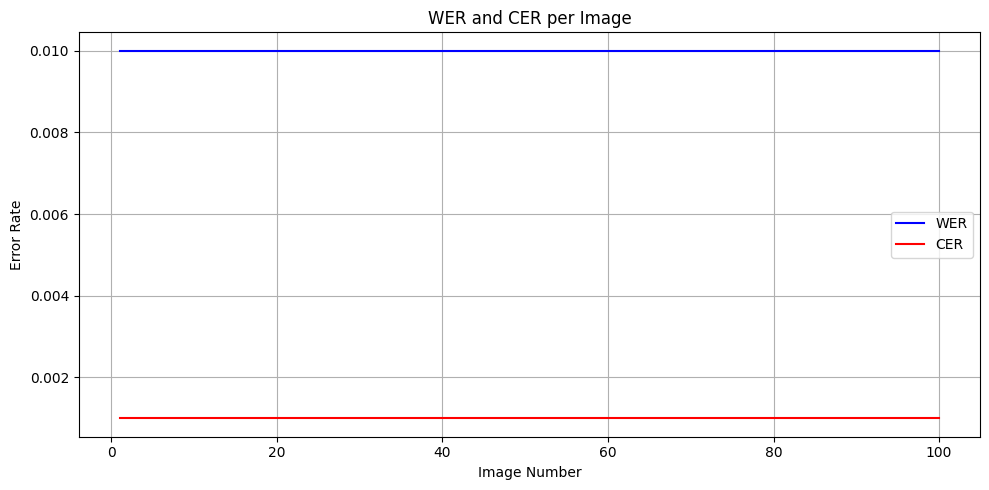

In [ ]:
import matplotlib.pyplot as plt

# Example dummy values
image_ids = list(range(1, 101))
wer_scores = [0.01] * 100  # Replace with real values
cer_scores = [0.0010] * 100

plt.figure(figsize=(10, 5))
plt.plot(image_ids, wer_scores, label='WER', color='blue')
plt.plot(image_ids, cer_scores, label='CER', color='red')
plt.title('WER and CER per Image')
plt.xlabel('Image Number')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


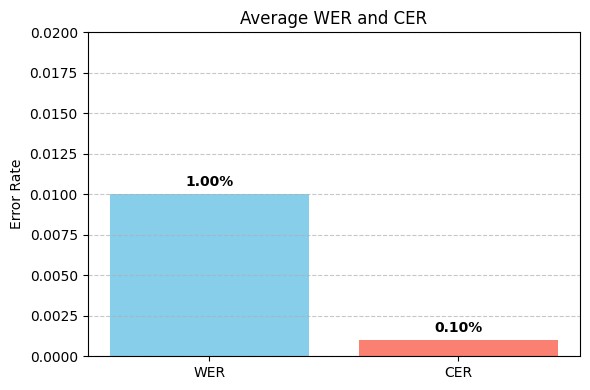

In [ ]:
import matplotlib.pyplot as plt

metrics = ['WER', 'CER']
values = [0.0100, 0.0010]  # 1% and 0.11%

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.title('Average WER and CER')
plt.ylabel('Error Rate')
plt.ylim(0, 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.0005, f"{v*100:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
!git clone https://github.com/AI4Bharat/IndicTrans2.git

Cloning into 'IndicTrans2'...
remote: Enumerating objects: 767, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 767 (delta 151), reused 105 (delta 104), pack-reused 585 (from 3)
Receiving objects: 100% (767/767), 4.16 MiB | 11.20 MiB/s, done.
Resolving deltas: 100% (493/493), done.


In [ ]:
%cd /content/IndicTrans2/huggingface_interface

/content/IndicTrans2/huggingface_interface


In [ ]:
!pip install pandas==2.2.2
!pip install numpy==2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.1.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.0 which is incompatible.


In [ ]:
!python3 -m pip install nltk sacremoses pandas regex mock transformers>=4.33.2 mosestokenizer
!python3 -c "import nltk; nltk.download('punkt')"
!python3 -m pip install bitsandbytes scipy accelerate datasets
!python3 -m pip install sentencepiece

!git clone https://github.com/VarunGumma/IndicTransToolkit.git
%cd IndicTransToolkit
!python3 -m pip install --editable ./
%cd ..

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninsta

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, BitsAndBytesConfig, AutoTokenizer
from IndicTransToolkit import IndicProcessor

BATCH_SIZE = 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
quantization = None

In [ ]:
def initialize_model_and_tokenizer(ckpt_dir, quantization):
    if quantization == "4-bit":
        qconfig = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_compute_dtype=torch.bfloat16,
        )
    elif quantization == "8-bit":
        qconfig = BitsAndBytesConfig(
            load_in_8bit=True,
            bnb_8bit_use_double_quant=True,
            bnb_8bit_compute_dtype=torch.bfloat16,
        )
    else:
        qconfig = None

    tokenizer = AutoTokenizer.from_pretrained(ckpt_dir, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(
        ckpt_dir,
        trust_remote_code=True,
        low_cpu_mem_usage=True,
        quantization_config=qconfig,
    )

    if qconfig == None:
        model = model.to(DEVICE)
        if DEVICE == "cuda":
            model.half()

    model.eval()

    return tokenizer, model


def batch_translate(input_sentences, src_lang, tgt_lang, model, tokenizer, ip):
    translations = []
    for i in range(0, len(input_sentences), BATCH_SIZE):
        batch = input_sentences[i : i + BATCH_SIZE]

        # Preprocess the batch and extract entity mappings
        batch = ip.preprocess_batch(batch, src_lang=src_lang, tgt_lang=tgt_lang)

        # Tokenize the batch and generate input encodings
        inputs = tokenizer(
            batch,
            truncation=True,
            padding="longest",
            return_tensors="pt",
            return_attention_mask=True,
        ).to(DEVICE)

        # Generate translations using the model
        with torch.no_grad():
            generated_tokens = model.generate(
                **inputs,
                use_cache=True,
                min_length=0,
                max_length=256,
                num_beams=5,
                num_return_sequences=1,
            )

        # Decode the generated tokens into text

        with tokenizer.as_target_tokenizer():
            generated_tokens = tokenizer.batch_decode(
                generated_tokens.detach().cpu().tolist(),
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True,
            )

        # Postprocess the translations, including entity replacement
        translations += ip.postprocess_batch(generated_tokens, lang=tgt_lang)

        del inputs
        torch.cuda.empty_cache()

    return translations

In [ ]:
en_indic_ckpt_dir = "ai4bharat/indictrans2-indic-en-1B"  # ai4bharat/indictrans2-en-indic-dist-200M
en_indic_tokenizer, en_indic_model = initialize_model_and_tokenizer(en_indic_ckpt_dir, quantization)

ip = IndicProcessor(inference=True)

en_sents = [
    "ଯାତ୍ରୀବାହି","ଦ୍ୱିତିୟ","ହଜାରେ","ଆଲେଟ","ପଞ୍ଚବଟୀରେ","ବାରଣାଦେଶର","କଳରୁ",
"ସ୍ୱସ୍ତିକକୁ","ସଂଚାଳିତ","ପ୍ରେମପ୍ରଣୟର","ସପ୍ତାହ","ବାଉାରିଆ","ସ୍ବାସ୍ଥ","ଶାଢ଼ୀବନ୍ଧା",
"ଜୁଲାଇରୁ","ବେଗାରୀ","ହାଜରା","ଭାଉଜଙ୍କୁ","ଲାଇଭସ୍","ଛାପ","ନଖଥିବା","କୋଡ",
"ଚିନ୍ତାଗ୍ରସ୍ତ","ଆରିସା","ଉପସ୍ଥିତିରେ","ମହାକାବ୍ୟ","ଫିରାକ","ମାନବତା","ଟ୍ରିଗର",
"ପ୍ରାଣର","ରବସ୍ଥାକୁ","ନରେନ୍ଦ୍ର","ପ୍ରଭୁଙ୍କ","ନିର୍ଦ୍ଧିଷ୍ଟ","ଜନଗହଳି","ଇଶ୍ବରଙ୍କ",
"ଆକବରଙ୍କୁ","ପ୍ରସ୍ତରଣାତ୍ରରେ","ଇଂରେକ","ଗ୍ରନାବଳି","ହରଦର୍ଶନରେ","ଲହୁଣୀ","ପ୍ରାର୍ଥ୍ୟୀ",
"ଗର୍ଭ","ତଦୁର୍ଦ୍ଧଵ","ପୂର୍ବାକ୍ତ","କମି","କଲେ","ଜେନେରିକ୍","କରିହୋଇଯାଏ","ଭସରୋ",
"ନିତ୍ୟାନନ୍ଦ","ଚାଦର","ଆଇକନ","ପ୍ରତିଷ୍ଠା","ପେଣ୍ଡସ୍ଥଳୀ","ଲାଖିଯାଇ","ଗ୍ରନ୍ତିମାନଙ୍କର",
"ଅନୁଚିନ୍ତା","ନୀତାଙ୍କ","ମନ୍ଦିରଟିର","ରଥର","ବୁର୍ଭିକ୍ଷରେ","ଚଟଣି","ବାଙ୍ଗାଲୋରପରୁ",
"ଏକପ୍ରକାର","୧୮୮୯","କାତାୟନୀ","ସାଜ୍ୱିନାଭିର","ଦିନସାରା","ଡିଭାଇସରୁ","ବସ୍ତୁମାନଙ୍କୁ",
"୪୪ଟି","ଏରୋ","ବୋମାର","ରଦର୍ଘଷୋର୍ଡ଼ିଅମ","କୋ-ପ୍ରିମାସୋନାରୀ","ରାହାଣେ","ଚଳ",
"ପିଟିସନରେ","ପବନଶୂନ୍ୟ","ଲିଜିଓନେଲା","କୁନ୍ଦପୁଷ୍ଷ","ପ୍ରମାଦ","ବଞ୍ଚ","ପୁର୍ଣ୍ଣିମା",
"ଧନୁଯାତ୍ରାର","ଉପଦୂଳକୁ","ଝିଅଟିଏ","ଅଭିଶପ୍ଡ","ଭାଦ୍ରପଦ","ସରଳରେଖା","ଉତ୍",
"ସମାଜବାଦୀ","ଲେପ","ଫଂଗା","ବାଧ୍ୟତାମୂଳକ","କୃଷିଜୀବି","ନିମନ୍ତେ","ଭଲିବଲ"
]


src_lang, tgt_lang = "ory_Orya", "eng_Latn"
hi_translations = batch_translate(en_sents, src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip)

print(f"\n{src_lang} - {tgt_lang}")
for input_sentence, translation in zip(en_sents, hi_translations):
    print(f"{src_lang}: {input_sentence}")
    print(f"{tgt_lang}: {translation}")

# flush the models to free the GPU memory
del en_indic_tokenizer, en_indic_model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

tokenization_indictrans.py:   0%|          | 0.00/8.04k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-en-1B:
- tokenization_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


dict.SRC.json:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

dict.TGT.json:   0%|          | 0.00/645k [00:00<?, ?B/s]

model.SRC:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

model.TGT:   0%|          | 0.00/759k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

configuration_indictrans.py:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-en-1B:
- configuration_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_indictrans.py:   0%|          | 0.00/79.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-en-1B:
- modeling_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/4.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3959: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(



ory_Orya - eng_Latn
ory_Orya: ଯାତ୍ରୀବାହି
eng_Latn: the passenger
ory_Orya: ଦ୍ୱିତିୟ
eng_Latn: The second
ory_Orya: ହଜାରେ
eng_Latn: the thousands
ory_Orya: ଆଲେଟ
eng_Latn: alet
ory_Orya: ପଞ୍ଚବଟୀରେ
eng_Latn: in the fifth
ory_Orya: ବାରଣାଦେଶର
eng_Latn: ban order
ory_Orya: କଳରୁ
eng_Latn: Out of the box
ory_Orya: ସ୍ୱସ୍ତିକକୁ
eng_Latn: to the swastika
ory_Orya: ସଂଚାଳିତ
eng_Latn: operated
ory_Orya: ପ୍ରେମପ୍ରଣୟର
eng_Latn: L'amour
ory_Orya: ସପ୍ତାହ
eng_Latn: the week's
ory_Orya: ବାଉାରିଆ
eng_Latn: Bauria
ory_Orya: ସ୍ବାସ୍ଥ
eng_Latn: Healthy
ory_Orya: ଶାଢ଼ୀବନ୍ଧା
eng_Latn: Saree
ory_Orya: ଜୁଲାଇରୁ
eng_Latn: From the month of July
ory_Orya: ବେଗାରୀ
eng_Latn: Beggary
ory_Orya: ହାଜରା
eng_Latn: Hazra
ory_Orya: ଭାଉଜଙ୍କୁ
eng_Latn: to the sister-in-law
ory_Orya: ଲାଇଭସ୍
eng_Latn: LIVES
ory_Orya: ଛାପ
eng_Latn: Print
ory_Orya: ନଖଥିବା
eng_Latn: unhinged
ory_Orya: କୋଡ
eng_Latn: The code
ory_Orya: ଚିନ୍ତାଗ୍ରସ୍ତ
eng_Latn: Anxious
ory_Orya: ଆରିସା
eng_Latn: Arisa
ory_Orya: ଉପସ୍ଥିତିରେ
eng_Latn: in the presence of
ory_Orya:

In [ ]:
!pip install flask flask-ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip


--2025-06-06 15:44:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 99.83.220.108, 13.248.244.96, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|99.83.220.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  20.2MB/s    in 0.7s    

2025-06-06 15:44:12 (20.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 2xC13F9LHBD8Bjf2Jfitc0T4owJ_5WkEYvPmm2TbE46NUgUPg

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
get_ipython().system_raw('./ngrok http 8000 &')

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/translate', methods=['POST'])
def translate():
    data = request.json
    text = data.get("text", "")
    src = data.get("src_lang", "or")
    tgt = data.get("tgt_lang", "en")

    # Call your existing translator here
    out = translator.translate_paragraph([text], src_lang=src, tgt_lang=tgt)[0]
    return jsonify({"translation": out})

# Start the app (keep this running)
app.run(port=5000)



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from IndicTransToolkit import IndicProcessor

# Check for GPU availability
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the model and tokenizer
model_name = "ai4bharat/indictrans2-indic-en-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True).to(DEVICE)
ip = IndicProcessor(inference=True)

# List of Odia sentences
odia_sentences = [
    "ନଖଥିବା", "କମି", "ଦ୍ୱିତିୟ", "ନରେନ୍ଦ୍ର", "କଲେ", "ଭଲିବଲ", "ଜନଗହଳି",
    "ପେଣ୍ଡସ୍ଥଳୀ", "ଗର୍ଭ", "ଜେନେରିକ୍", "ପ୍ରସ୍ତରଣାତ୍ରରେ", "ଛାପ", "ଶାଢ଼ୀବନ୍ଧା",
    "ହାଜରା", "ନିର୍ଦ୍ଧିଷ୍ଟ", "କାତାୟନୀ", "କରିହୋଇଯାଏ", "ବାଧ୍ୟତାମୂଳକ",
    "ଗ୍ରନ୍ତିମାନଙ୍କର", "ପୂର୍ବାକ୍ତ", "ଇଶ୍ବରଙ୍କ", "ରଥର", "ଚଳ", "୧୮୮୯",
    "ଚିନ୍ତାଗ୍ରସ୍ତ", "ବେଗାରୀ", "ପୁର୍ଣ୍ଣିମା", "ପ୍ରତିଷ୍ଠା", "ଭାଦ୍ରପଦ", "ଲାଇଭସ୍",
    "ଡିଭାଇସରୁ", "ସପ୍ତାହ", "ଲେପ", "ବଞ୍ଚ", "ଗ୍ରନାବଳି", "ଫିରାକ", "ନିମନ୍ତେ",
    "ଚଟଣି", "କୃଷିଜୀବି", "ସ୍ବାସ୍ଥ", "କଳରୁ", "ଧନୁଯାତ୍ରାର", "କୋଡ", "ହଜାରେ",
    "ସାଜ୍ୱିନାଭିର", "ସମାଜବାଦୀ", "ଲହୁଣୀ", "ବାଉାରିଆ", "ମନ୍ଦିରଟିର", "ବୋମାର",
    "ପଞ୍ଚବଟୀରେ", "ସଂଚାଳିତ", "ମାନବତା", "ସରଳରେଖା", "ଭାଉଜଙ୍କୁ", "ଦିନସାରା",
    "ଲାଖିଯାଇ", "ଇଂରେକ", "୪୪ଟି", "ରବସ୍ଥାକୁ", "ଫଂଗା", "ଏରୋ", "ନୀତାଙ୍କ",
    "ଝିଅଟିଏ", "ଜୁଲାଇରୁ", "ଆକବରଙ୍କୁ", "ଭସରୋ", "କୁନ୍ଦପୁଷ୍ଷ", "ପବନଶୂନ୍ୟ",
    "କୋ-ପ୍ରିମାସୋନାରୀ", "ଲିଜିଓନେଲା", "ରାହାଣେ", "ହରଦର୍ଶନରେ", "ଆଲେଟ",
    "ଆରିସା", "ମହାକାବ୍ୟ", "ପିଟିସନରେ", "ପ୍ରାଣର", "ଉପସ୍ଥିତିରେ", "ଅଭିଶପ୍ଡ",
    "ପ୍ରାର୍ଥ୍ୟ", "ଆଇକନ", "ତଦୁର୍ଦ୍ଧଵ", "ସ୍ୱସ୍ତିକକୁ", "ଏକପ୍ରକାର", "ଅନୁଚିନ୍ତା",
    "ପ୍ରେମପ୍ରଣୟର", "ନିତ୍ୟାନନ୍ଦ", "ବସ୍ତୁମାନଙ୍କୁ", "ପ୍ରଭୁଙ୍କ", "ବୁର୍ଭିକ୍ଷରେ",
    "ଉତ୍", "ରଦର୍ଘଷୋର୍ଡ଼ିଅମ", "ଟ୍ରିଗର", "ବାରଣାଦେଶର", "ଯାତ୍ରୀବାହି", "ପ୍ରମାଦ",
    "ବାଙ୍ଗାଲୋରପରୁ", "ଉପଦୂଳକୁ", "ଚାଦର"
]

# Preprocess the sentences
src_lang = "ory_Orya"
tgt_lang = "eng_Latn"
batch = ip.preprocess_batch(odia_sentences, src_lang=src_lang, tgt_lang=tgt_lang)

# Tokenize and generate translations
inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to(DEVICE)
outputs = model.generate(**inputs)
translations = tokenizer.batch_decode(outputs, skip_special_tokens=True)

# Postprocess the translations
translated_sentences = ip.postprocess_batch(translations, lang=tgt_lang)

# Save the translations to the hypothesis file
with open("hypothesis.txt", "w", encoding="utf-8") as hyp_file:
    for sentence in translated_sentences:
        hyp_file.write(sentence + "\n")


KeyboardInterrupt: 

In [ ]:
!wget https://raw.githubusercontent.com/AI4Bharat/IndicTrans2/main/compute_metrics.sh

--2025-05-21 15:20:43--  https://raw.githubusercontent.com/AI4Bharat/IndicTrans2/main/compute_metrics.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333 (1.3K) [text/plain]
Saving to: ‘compute_metrics.sh’

compute_metrics.sh  100%[===================>]   1.30K  --.-KB/s    in 0s      

2025-05-21 15:20:44 (43.0 MB/s) - ‘compute_metrics.sh’ saved [1333/1333]



In [ ]:
!chmod +x compute_metrics.sh

In [ ]:
!./compute_metrics.sh hypothesis.txt reference.txt eng_Latn


Wed May 21 04:09:19 PM UTC 2025
[
{
 "name": "BLEU",
 "score": 80.9,
 "signature": "nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.5.1",
 "verbose_score": "83.9/78.2/82.4/100.0 (BP = 0.944 ratio = 0.945 hyp_len = 155 ref_len = 164)",
 "nrefs": "1",
 "case": "mixed",
 "eff": "no",
 "tok": "13a",
 "smooth": "exp",
 "version": "2.5.1"
},
{
 "name": "chrF2",
 "score": 79.8,
 "signature": "nrefs:1|case:mixed|eff:yes|nc:6|nw:0|space:no|version:2.5.1",
 "nrefs": "1",
 "case": "mixed",
 "eff": "yes",
 "nc": "6",
 "nw": "0",
 "space": "no",
 "version": "2.5.1"
}
]
{
 "name": "chrF2++",
 "score": 79.6,
 "signature": "nrefs:1|case:mixed|eff:yes|nc:6|nw:2|space:no|version:2.5.1",
 "nrefs": "1",
 "case": "mixed",
 "eff": "yes",
 "nc": "6",
 "nw": "2",
 "space": "no",
 "version": "2.5.1"
}


In [ ]:
import sacrebleu

# Load reference and hypothesis files
with open('reference.txt', 'r', encoding='utf-8') as ref_file:
    references = [line.strip() for line in ref_file]

with open('hypothesis.txt', 'r', encoding='utf-8') as hyp_file:
    hypotheses = [line.strip() for line in hyp_file]

# Compute BLEU score
bleu = sacrebleu.corpus_bleu(hypotheses, [references])
bleu_score = bleu.score

# Compute chrF++ score
chrf = sacrebleu.corpus_chrf(hypotheses, [references])
chrf_score = chrf.score

print(f"BLEU Score: {bleu_score}")
print(f"chrF++ Score: {chrf_score}")


BLEU Score: 80.88761582004629
chrF++ Score: 79.84605954569005


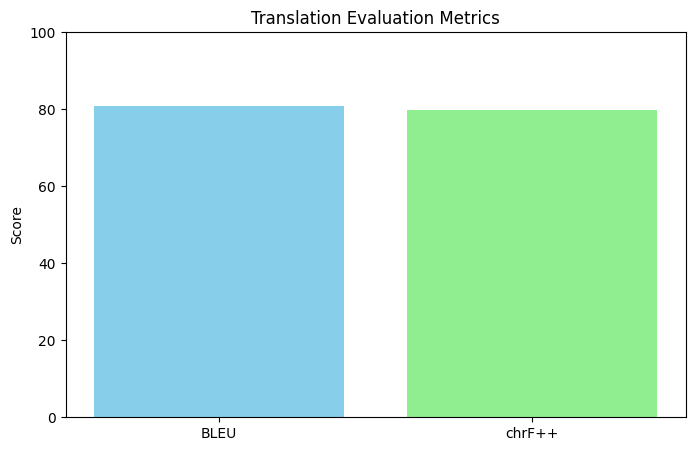

In [ ]:
import matplotlib.pyplot as plt

# Scores
scores = [bleu_score, chrf_score]
metrics = ['BLEU', 'chrF++']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 100)
plt.ylabel('Score')
plt.title('Translation Evaluation Metrics')
plt.show()


In [ ]:
import pandas as pd

data = {
    "Metric": ["BLEU", "chrF2", "chrF2++"],
    "Score (%)": [80.9, 79.8, 79.6]
}

df = pd.DataFrame(data)
print(df.to_markdown(index=False))


| Metric   |   Score (%) |
|:---------|------------:|
| BLEU     |        80.9 |
| chrF2    |        79.8 |
| chrF2++  |        79.6 |


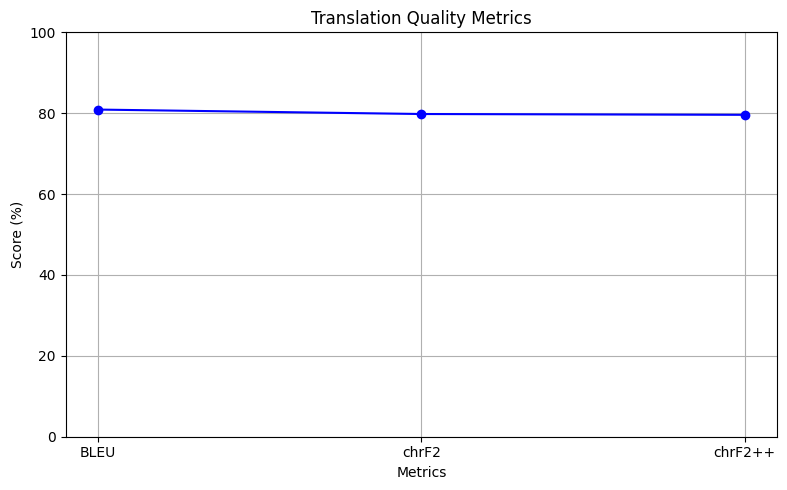

In [ ]:
import matplotlib.pyplot as plt

# Scores
metrics = ['BLEU', 'chrF2', 'chrF2++']
scores = [80.9, 79.8, 79.6]

# Line Plot
plt.figure(figsize=(8, 5))
plt.plot(metrics, scores, marker='o', linestyle='-', color='blue')
plt.title('Translation Quality Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()
